In [1]:
from tensor.operation.generate import coil100_data, random_tensor
import threading
import time
# %pip install matplotlib
import matplotlib.pyplot as plt
try:
    import wget
except:
    %pip install wget

from tensor.decomposition.cpals import CP_ALS
from tensor.decomposition.cprand import CP_RAND


## Time per iteration

In [2]:
cpals_avg_time = []
cprand_avg_time = []
n = 2 # number of times to run the experiment for taking average
l, w, s = 200, 250, 10

for I in range(l, w, s):
    X  = random_tensor(3, (I,I,I), 7, 0.01)
    start = time.time()
    for _ in range(n):
       CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cpals_avg_time.append((end-start)/(n*100))

    start = time.time()
    for _ in range(n):
        CP_RAND.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cprand_avg_time.append((end-start)/(n*100))
    print(f"For I = {I}, CP_ALS avg time = {cpals_avg_time[-1]}, CP_RAND avg time = {cprand_avg_time[-1]}")


For I = 200, CP_ALS avg time = 0.5364918982982636, CP_RAND avg time = 0.15165013909339906
For I = 210, CP_ALS avg time = 0.6280603909492493, CP_RAND avg time = 0.15755019545555116
For I = 220, CP_ALS avg time = 0.6076714849472046, CP_RAND avg time = 0.16056275129318237
For I = 230, CP_ALS avg time = 0.9011083817481995, CP_RAND avg time = 0.1687044632434845
For I = 240, CP_ALS avg time = 1.1377624070644379, CP_RAND avg time = 0.1871463143825531


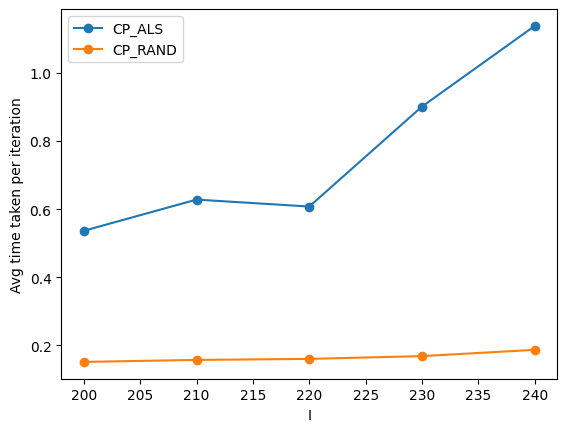

In [3]:

plt.plot(range(l,w,s), cpals_avg_time, 'o-')    
plt.plot(range(l,w,s), cprand_avg_time, 'o-')
plt.legend(["CP_ALS", "CP_RAND"])
plt.xlabel("I")
plt.ylabel("Avg time taken per iteration")
plt.show()


For I = 200, CP_ALS avg time = 0.36246963977813723, CP_RAND avg time = 0.1983841574192047
For I = 210, CP_ALS avg time = 0.6135152471065521, CP_RAND avg time = 0.20149853944778442
For I = 220, CP_ALS avg time = 0.5198082911968231, CP_RAND avg time = 0.18644900918006896
For I = 230, CP_ALS avg time = 0.688667516708374, CP_RAND avg time = 0.23982480883598328
For I = 240, CP_ALS avg time = 0.767922078371048, CP_RAND avg time = 0.2623698997497559


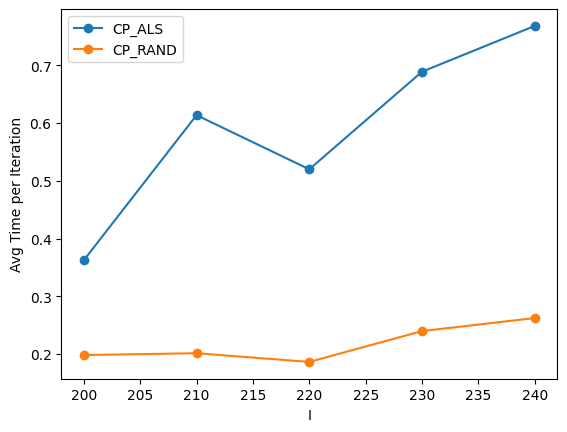

In [2]:
cpals_avg_time = []
cprand_avg_time = []
cprandmix_avg_time = []

n = 2 # number of times to run the experiment for taking average
l, w, s = 200, 250, 10

for I in range(l, w, s):
    X  = random_tensor(3, (I,I,I), 7, 0.01)
    start = time.time()
    for _ in range(n):
       CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cpals_avg_time.append((end-start)/(n*100))

    start = time.time()
    for _ in range(n):
        CP_RAND.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
    end = time.time()
    cprand_avg_time.append((end-start)/(n*100))
    
    # start = time.time()
    # for _ in range(n):
    #     CPRAND_MIX.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
    # end = time.time()
    # cprandmix_avg_time.append((end-start)/(n*100))
    
    print(f"For I = {I}, CP_ALS avg time = {cpals_avg_time[-1]}, CP_RAND avg time = {cprand_avg_time[-1]}")


plt.plot(range(l,w,s), cpals_avg_time, 'o-')    
plt.plot(range(l,w,s), cprand_avg_time, 'o-')
# plt.plot(range(l,w,s), cprandmix_avg_time, 'o-')
plt.legend(["CP_ALS", "CP_RAND"])
plt.xlabel("I")
plt.ylabel("Avg Time per Iteration (Order: 3)")
plt.show()


In [3]:
# cpals_avg_time = []
# cprand_avg_time = []
# cprandmix_avg_time = []

# n = 2 # number of times to run the experiment for taking average
# l, w, s = 200, 250, 10

# for I in range(l, w, s):
#     X  = random_tensor(5, (I,I,I,I,I), 7, 0.01)
    
#     start = time.time()
#     for _ in range(n):
#        CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
#     end = time.time()
#     cpals_avg_time.append((end-start)/(n*100))

#     start = time.time()
#     for _ in range(n):
#         CP_RAND.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
#     end = time.time()
#     cprand_avg_time.append((end-start)/(n*100))
    
#     # start = time.time()
#     # for _ in range(n):
#     #     CPRAND_MIX.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=False)
#     # end = time.time()
#     # cprandmix_avg_time.append((end-start)/(n*100))
    
#     print(f"For I = {I}, CP_ALS avg time = {cpals_avg_time[-1]}, CP_RAND avg time = {cprand_avg_time[-1]}")


# plt.plot(range(l,w,s), cpals_avg_time, 'o-')    
# plt.plot(range(l,w,s), cprand_avg_time, 'o-')
# # plt.plot(range(l,w,s), cprandmix_avg_time, 'o-')
# plt.legend(["CP_ALS", "CP_RAND"])
# plt.xlabel("I")
# plt.ylabel("Avg Time per Iteration (Order: 5)")
# plt.show()


MemoryError: Unable to allocate 2.33 TiB for an array with shape (200, 200, 200, 200, 200) and data type float64

# Stopping Criteria

In [2]:
from tensor.operation.generate import coil100_data, random_tensor
import threading
import time
# %pip install matplotlib
import matplotlib.pyplot as plt
try:
    import wget
except:
    %pip install wget

from tensor.decomposition.cpals import CP_ALS
from tensor.decomposition.cprand import CP_RAND

cpals_avg_time_exact = []
cpals_avg_time_sampled = []

n = 4 # number of times to run the experiment for taking average
l, w, s = 100, 250, 10


for I in range(l, w, s):
   X  = random_tensor(3, (I,I,I), 7, 0.01)
   start = time.time()
   for _ in range(n):
      CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=True)
   end = time.time()
   cpals_avg_time_exact.append((end-start)/(n*100))

   start = time.time()
   for _ in range(n):
      CP_ALS.decompose(X, 5, max_iter=100, eps=0.01, init_type="random", check_convergence=True, stopping_criteria="sampled")
   end = time.time()
   cpals_avg_time_sampled.append((end-start)/(n*100))

   print(f"For I = {I}, CP_ALS avg time (exact) = {cpals_avg_time_exact[-1]}, CP_ALS avg time (sampled) = {cpals_avg_time_sampled[-1]}")



plt.plot(range(l,w,s), cpals_avg_time_exact, 'o-')    
plt.plot(range(l,w,s), cpals_avg_time_sampled, 'o-')
# plt.plot(range(l,w,s), cprandmix_avg_time, 'o-')
plt.legend(["Exact", "Sampled"])
plt.xlabel("I")
plt.ylabel("Avg Time per Iteration (Order: 3)")
plt.show()


For I = 100, CP_ALS avg time (exact) = 0.03712947249412537, CP_ALS avg time (sampled) = 0.059517802596092226
For I = 110, CP_ALS avg time (exact) = 0.05100068092346191, CP_ALS avg time (sampled) = 0.07949423789978027
For I = 120, CP_ALS avg time (exact) = 0.06594845414161682, CP_ALS avg time (sampled) = 0.10642722606658936
For I = 130, CP_ALS avg time (exact) = 0.09380761444568635, CP_ALS avg time (sampled) = 0.169397189617157
For I = 140, CP_ALS avg time (exact) = 0.12394170761108399, CP_ALS avg time (sampled) = 0.20352594554424286
For I = 150, CP_ALS avg time (exact) = 0.1730323725938797, CP_ALS avg time (sampled) = 0.2433789026737213


KeyboardInterrupt: 